In [1]:
import pandas as pd

### csv file link - https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [2]:
file_path = r'C:\Users\User\OneDrive\Desktop\customer churn\Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

In [3]:
df = df.drop(['customerID'],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
def value_count(column_name):
    return df[column_name].value_counts()

In [6]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [7]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
for column in df:
    print('\n',value_count(column))


 gender
Male      3555
Female    3488
Name: count, dtype: int64

 SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

 Partner
No     3641
Yes    3402
Name: count, dtype: int64

 Dependents
No     4933
Yes    2110
Name: count, dtype: int64

 tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

 PhoneService
Yes    6361
No      682
Name: count, dtype: int64

 MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

 InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

 OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

 OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

 DeviceProtection
No                     3095
Yes     

#### Apply mapping to specific columns

In [9]:
category_mapping = {
    'Yes': 1,
    'No': 0,
    'No internet service': 3,
    'No phone service': 3,
    'Male':1,
    'Female':0
}
columns_to_map = ['gender','Partner', 'Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [10]:
for column in columns_to_map:
    df[column] = df[column].map(category_mapping)

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the values
scaler = MinMaxScaler()
df['MonthlyCharges'] = scaler.fit_transform(df[['MonthlyCharges']])
df['tenure'] = scaler.fit_transform(df[['tenure']])

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'Partner'}>,
        <Axes: title={'center': 'Dependents'}>],
       [<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'PhoneService'}>,
        <Axes: title={'center': 'MultipleLines'}>,
        <Axes: title={'center': 'OnlineSecurity'}>],
       [<Axes: title={'center': 'OnlineBackup'}>,
        <Axes: title={'center': 'DeviceProtection'}>,
        <Axes: title={'center': 'TechSupport'}>,
        <Axes: title={'center': 'StreamingTV'}>],
       [<Axes: title={'center': 'StreamingMovies'}>,
        <Axes: title={'center': 'PaperlessBilling'}>,
        <Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

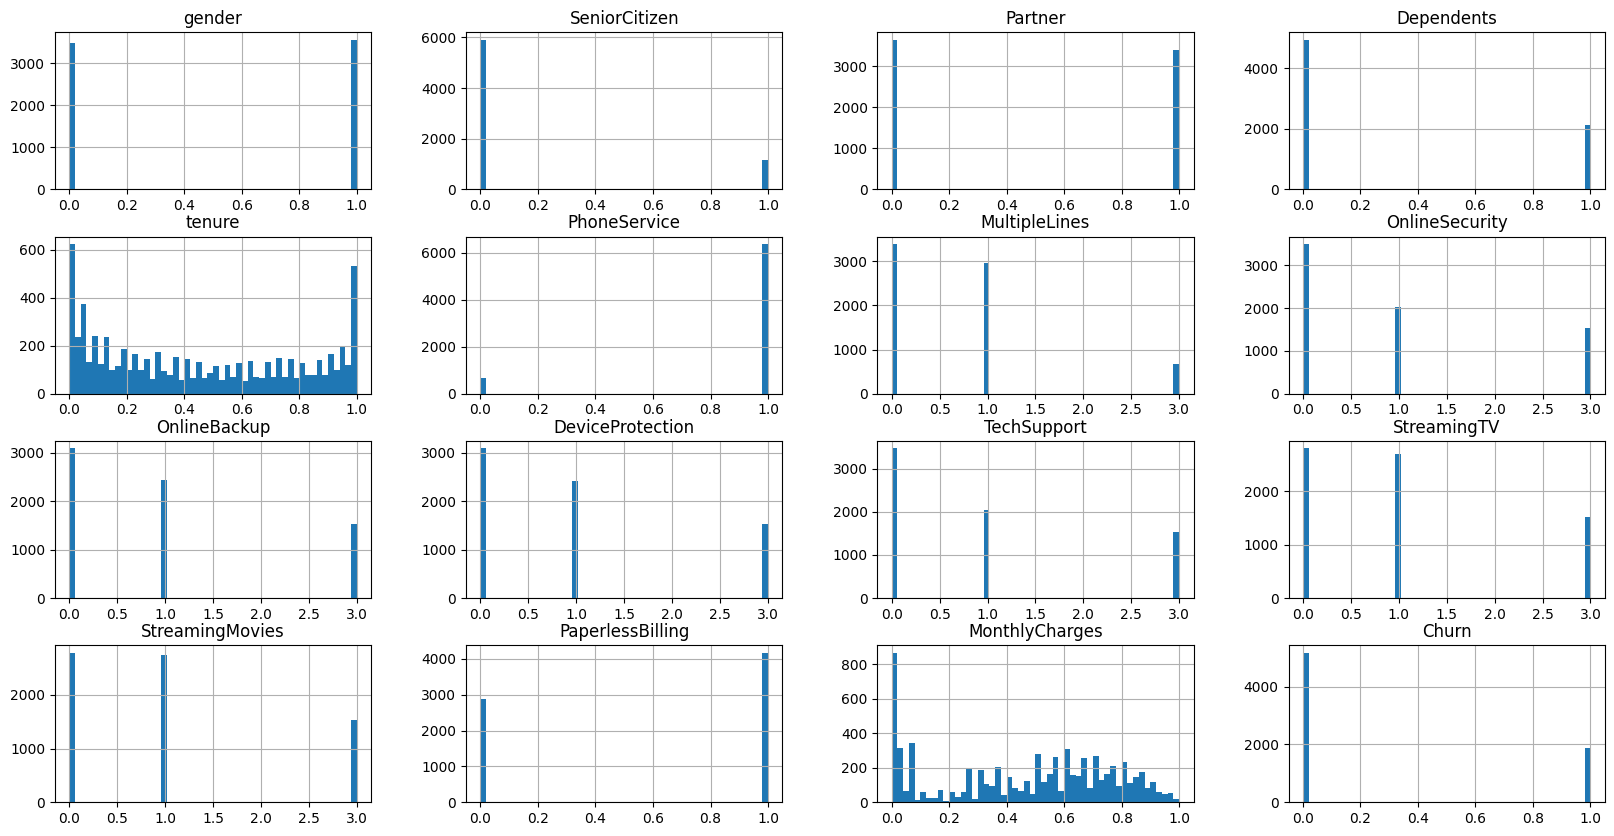

In [12]:
df.hist(bins=50,figsize=(20,10))

In [13]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,3,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,0.115423,29.85,0
1,1,0,0,0,0.472222,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,0.385075,1889.5,0
2,1,0,0,0,0.027778,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,0.354229,108.15,1
3,1,0,0,0,0.625000,0,3,DSL,1,0,1,1,0,0,One year,0,Bank transfer,0.239303,1840.75,0
4,0,0,0,0,0.027778,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,0.521891,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,0.662189,1990.5,0
7039,0,0,1,1,1.000000,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card,0.845274,7362.9,0
7040,0,0,1,1,0.152778,0,3,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,0.112935,346.45,0
7041,1,1,1,0,0.055556,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,0.558706,306.6,1


In [14]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']
# Apply one-hot encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity

encoded_values = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(categorical_cols))
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)

In [15]:
df_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,3,0,1,0,...,0.115423,29.85,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,0.472222,1,0,1,0,1,...,0.385075,1889.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,0,0,0,0.027778,1,0,1,1,0,...,0.354229,108.15,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,0.625000,0,3,1,0,1,...,0.239303,1840.75,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0.027778,1,0,0,0,0,...,0.521891,151.65,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,1,0,1,...,0.662189,1990.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,0,0,1,1,1.000000,1,1,0,1,1,...,0.845274,7362.9,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,0,0,1,1,0.152778,0,3,1,0,0,...,0.112935,346.45,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1,1,1,0,0.055556,1,1,0,0,0,...,0.558706,306.6,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          7043 non-null   int64  
 1   SeniorCitizen                   7043 non-null   int64  
 2   Partner                         7043 non-null   int64  
 3   Dependents                      7043 non-null   int64  
 4   tenure                          7043 non-null   float64
 5   PhoneService                    7043 non-null   int64  
 6   MultipleLines                   7043 non-null   int64  
 7   OnlineSecurity                  7043 non-null   int64  
 8   OnlineBackup                    7043 non-null   int64  
 9   DeviceProtection                7043 non-null   int64  
 10  TechSupport                     7043 non-null   int64  
 11  StreamingTV                     7043 non-null   int64  
 12  StreamingMovies                 70

In [17]:
import numpy as np
df_encoded['TotalCharges'] = df_encoded['TotalCharges'].replace(' ', np.nan)
df_encoded['TotalCharges'] = df_encoded['TotalCharges'].astype(float)

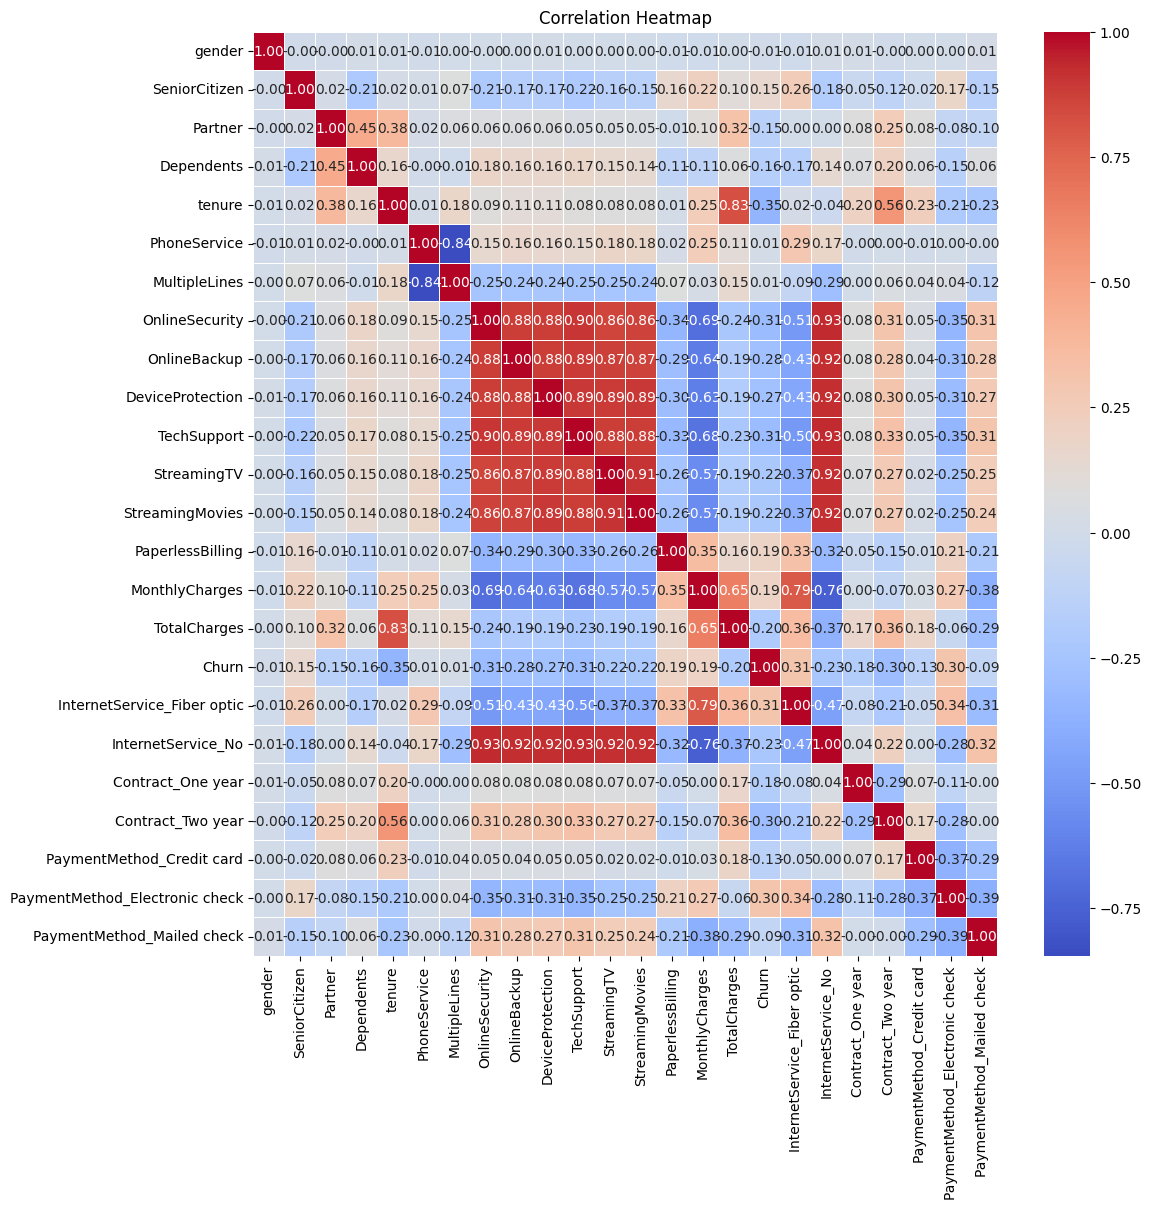

In [18]:
import matplotlib.pylab as plt
import seaborn as sns

numeric_df = df.select_dtypes(include='number')
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [19]:
df_encoded = df_encoded.drop(['MultipleLines','PhoneService','gender'], axis=1)

In [20]:
df_encoded.dtypes

SeniorCitizen                       int64
Partner                             int64
Dependents                          int64
tenure                            float64
OnlineSecurity                      int64
OnlineBackup                        int64
DeviceProtection                    int64
TechSupport                         int64
StreamingTV                         int64
StreamingMovies                     int64
PaperlessBilling                    int64
MonthlyCharges                    float64
TotalCharges                      float64
Churn                               int64
InternetService_Fiber optic       float64
InternetService_No                float64
Contract_One year                 float64
Contract_Two year                 float64
PaymentMethod_Credit card         float64
PaymentMethod_Electronic check    float64
PaymentMethod_Mailed check        float64
dtype: object

In [21]:
df_encoded

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.013889,0,1,0,0,0,0,...,0.115423,29.85,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0.472222,1,0,1,0,0,0,...,0.385075,1889.50,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,0.027778,1,1,0,0,0,0,...,0.354229,108.15,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0.625000,1,0,1,1,0,0,...,0.239303,1840.75,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,0.027778,0,0,0,0,0,0,...,0.521891,151.65,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0.333333,1,0,1,1,1,1,...,0.662189,1990.50,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,0,1,1,1.000000,0,1,1,0,1,1,...,0.845274,7362.90,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,0,1,1,0.152778,1,0,0,0,0,0,...,0.112935,346.45,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1,1,0,0.055556,0,0,0,0,0,0,...,0.558706,306.60,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
df_encoded.dropna(subset=['TotalCharges'], inplace=True)

In [23]:
from sklearn.model_selection import train_test_split\

X,y = df_encoded.drop(['Churn'],axis=1),df_encoded['Churn'].copy()
X_train_val,X_test,y_train_val,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
X_train,X_val,y_train,y_val = train_test_split(X_train_val,y_train_val,test_size=0.2,random_state=41)

In [25]:
[X_train.shape,y_train.shape],[X_val.shape,y_val.shape],[X_test.shape,y_test.shape]

([(4500, 20), (4500,)], [(1125, 20), (1125,)], [(1407, 20), (1407,)])

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def metrics(model, X, y,threshold=0.5):
    y_prob = model.predict_proba(X)[:, 1]  
    y_pred = (y_prob >= threshold).astype(int)
    
    precision = precision_score(y, y_pred)  
    recall = recall_score(y, y_pred)  
    f1 = f1_score(y, y_pred)  

    print(f"Precision is: {precision}, '\n'Recall is: {recall},'\n'F1_score is: {f1}")

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
def conf_matrix(model, X, y,threshold=0.5):
    y_prob = model.predict_proba(X)[:, 1]  
    y_pred = (y_prob >= threshold).astype(int)

    cm = confusion_matrix(y, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
    cm_display.plot()

In [29]:
metrics(log_reg,X_train,y_train)

Precision is: 0.6579961464354528, '
'Recall is: 0.5598360655737705,'
'F1_score is: 0.6049601417183348


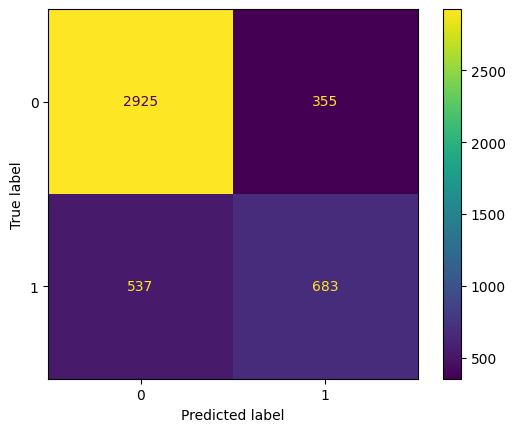

In [30]:
conf_matrix(log_reg,X_train,y_train)

### Random SearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],  
    'solver': ['saga', 'liblinear']  
}

scorer = make_scorer(accuracy_score)
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_grid,
    n_iter=10,  
    scoring=scorer,
    cv=5,
    random_state=42,
    n_jobs=-1,
    error_score='raise'  

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1}
Best Cross-Validation Accuracy: 0.8026666666666668


In [32]:
best_model_log = random_search.best_estimator_
y_pred = best_model_log.predict(X_val)
print("Validation Set Accuracy:", accuracy_score(y_val, y_pred))

Validation Set Accuracy: 0.824


In [33]:
metrics(best_model_log,X_val,y_val)

Precision is: 0.6558704453441295, '
'Recall is: 0.5890909090909091,'
'F1_score is: 0.6206896551724138


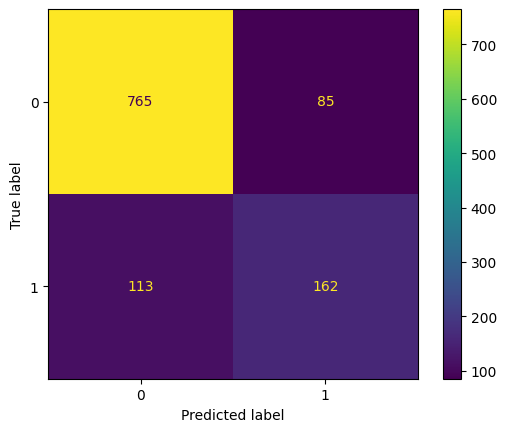

In [34]:
conf_matrix(best_model_log,X_val,y_val)

#### Decision tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)
metrics(tree_clf,X_val,y_val)

Precision is: 0.46107784431137727, '
'Recall is: 0.56,'
'F1_score is: 0.5057471264367817


In [36]:
param_grid = {
    'max_depth': [5, 8, 12, 18],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid,
    cv=10,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5}
Best Cross-Validation Accuracy: 0.7848888888888889


In [37]:
best_model_des_tree = random_search.best_estimator_
y_pred = best_model_des_tree.predict(X_val)
print("Validation Set Accuracy:", accuracy_score(y_val, y_pred))

Validation Set Accuracy: 0.7964444444444444


In [38]:
metrics(best_model_des_tree,X_val,y_val)

Precision is: 0.5777027027027027, '
'Recall is: 0.6218181818181818,'
'F1_score is: 0.5989492119089317


#### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X_train,y_train)
metrics(rnd_clf,X_val,y_val)

Precision is: 0.5892116182572614, '
'Recall is: 0.5163636363636364,'
'F1_score is: 0.5503875968992248


In [40]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

random_search_rnd = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    cv=5,
    n_jobs=-1,
    random_state=42
)

random_search_rnd.fit(X_train, y_train)
print("Best Parameters:", random_search_rnd.best_params_)
print("Best Cross-Validation Accuracy:", random_search_rnd.best_score_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'class_weight': 'balanced_subsample'}
Best Cross-Validation Accuracy: 0.7795555555555557


In [41]:
best_model_rnd_for = random_search.best_estimator_
y_pred = best_model_rnd_for.predict(X_val)
print("Validation Set Accuracy:", accuracy_score(y_val, y_pred))

Validation Set Accuracy: 0.7964444444444444


In [42]:
metrics(best_model_rnd_for,X_val,y_val)

Precision is: 0.5777027027027027, '
'Recall is: 0.6218181818181818,'
'F1_score is: 0.5989492119089317


####  XGBClassifier

In [43]:
from xgboost import XGBRFClassifier

xgb_clf = XGBRFClassifier(random_state=42)
xgb_clf.fit(X_train,y_train)
metrics(xgb_clf,X_val,y_val)

Precision is: 0.6309963099630996, '
'Recall is: 0.6218181818181818,'
'F1_score is: 0.6263736263736264


#### SVM

In [44]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train,y_train)
metrics(svm_clf,X_val,y_val)

Precision is: 0.775, '
'Recall is: 0.11272727272727273,'
'F1_score is: 0.19682539682539682


In [45]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}

random_search_svc = RandomizedSearchCV(SVC(probability=True), param_grid, cv=6)
random_search_svc.fit(X_train,y_train)
print("Best Parameters:", random_search_svc.best_params_)
print("Best Cross-Validation Accuracy:", random_search_svc.best_score_)

c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}
Best Cross-Validation Accuracy: 0.7626666666666666


In [46]:
best_model_svc = random_search_svc.best_estimator_
y_pred = best_model_svc.predict(X_val)
print("Validation Set Accuracy:", accuracy_score(y_val, y_pred))

Validation Set Accuracy: 0.7706666666666667


In [47]:
metrics(best_model_svc,X_val,y_val)

Precision is: 0.5779816513761468, '
'Recall is: 0.2290909090909091,'
'F1_score is: 0.328125


#### AdaBoost

In [48]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [49]:
metrics(ada_clf,X_val,y_val)

Precision is: 0.6637168141592921, '
'Recall is: 0.5454545454545454,'
'F1_score is: 0.5988023952095808


In [54]:
y_pred = ada_clf.predict(X_val)
print("Validation Set Accuracy:", accuracy_score(y_val, y_pred))

Validation Set Accuracy: 0.8213333333333334


#### Voting Classifier

In [57]:
from sklearn.ensemble import VotingClassifier

voting_clf= VotingClassifier(
    estimators=[
        ('lr',best_model_log),
        ('tree_clf',best_model_des_tree),
        ('ada',ada_clf),
        ('rnd_for',best_model_rnd_for)
    ],
    voting='hard'
    )

voting_clf.fit(X_train,y_train)

y_pred = voting_clf.predict(X_val)
precision = precision_score(y_val, y_pred)  
recall = recall_score(y_val, y_pred)  
f1 = f1_score(y_val, y_pred)  
precision,recall,f1

c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


(0.6570247933884298, 0.5781818181818181, 0.6150870406189555)

In [58]:
y_pred = voting_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7867803837953091

In [59]:
y_pred = voting_clf.predict(X_train)
accuracy_score(y_train,y_pred)

0.8075555555555556

### Stacking

In [67]:
from sklearn.ensemble import StackingClassifier

meta_model = LogisticRegression()

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', best_model_log),
        ('tree_clf', best_model_des_tree),
        ('ada', ada_clf),
        ('rnd_for', best_model_rnd_for)
    ],
    final_estimator=meta_model,  
    cv=10
)

stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Stacking Classifier Accuracy:", accuracy)

c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_weight_boosting.p

Stacking Classifier Accuracy: 0.7931769722814499


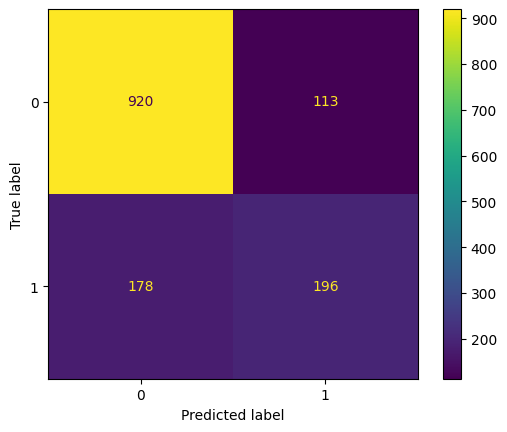

In [68]:
conf_matrix(stacking_clf,X_test,y_test)

In [69]:
y_pred = stacking_clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Stacking Classifier Accuracy:", accuracy)

Stacking Classifier Accuracy: 0.8086666666666666
